# 1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create python code explicitly demonstrating your explanation using numpy and scipy.stats

SLR is basically what you guess or predict a Y value would be based on the X value in terms of a linear affiliation. Which put in an equation would be; Y = β0 + β1X + ϵ

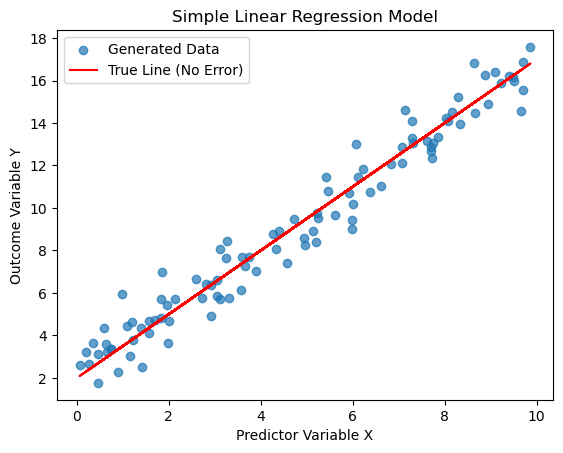

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Setting the parameters of the SLR model
np.random.seed(42)  # For reproducibility
n = 100  # Number of samples
beta_0 = 2.0  # Intercept
beta_1 = 1.5  # Slope
sigma = 1.0  # Standard deviation of the error term

# Generate random X values
X = np.random.uniform(0, 10, n)

# Generate the error term from a normal distribution
epsilon = norm.rvs(0, sigma, size=n)

# Calculate Y values based on the SLR model
Y = beta_0 + beta_1 * X + epsilon

# Plotting the data
plt.scatter(X, Y, alpha=0.7, label='Generated Data')
plt.plot(X, beta_0 + beta_1 * X, color='red', label='True Line (No Error)')
plt.xlabel("Predictor Variable X")
plt.ylabel("Outcome Variable Y")
plt.title("Simple Linear Regression Model")
plt.legend()
plt.show()


# 2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using pandas and import statsmodels.formula.api as smf

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     2251.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           2.06e-69
Time:                        02:59:53   Log-Likelihood:                -131.15
No. Observations:                 100   AIC:                             266.3
Df Residuals:                      98   BIC:                             271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2151      0.170     13.008      0.0

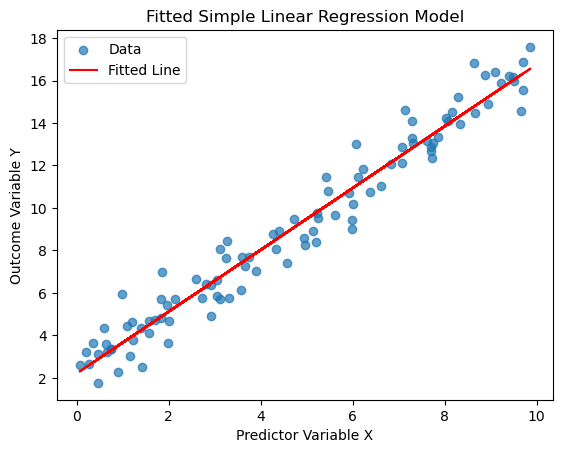

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Step 1: Simulate Data
np.random.seed(42)
n = 100
beta_0 = 2.0  # Intercept
beta_1 = 1.5  # Slope
sigma = 1.0  # Standard deviation of the error term

# Generate random X values
X = np.random.uniform(0, 10, n)

# Generate the error term
epsilon = np.random.normal(0, sigma, n)

# Calculate Y values
Y = beta_0 + beta_1 * X + epsilon

# Convert to a DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})

# Step 2: Fit the Simple Linear Regression Model
model = smf.ols('Y ~ X', data=data).fit()

# Display model summary
print(model.summary())

# Step 3: Visualize the Fitted Model
plt.scatter(data['X'], data['Y'], label='Data', alpha=0.7)
plt.plot(data['X'], model.predict(data), color='red', label='Fitted Line')
plt.xlabel("Predictor Variable X")
plt.ylabel("Outcome Variable Y")
plt.title("Fitted Simple Linear Regression Model")
plt.legend()
plt.show()


# 3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; but, hint though: simulation of random sampling variation

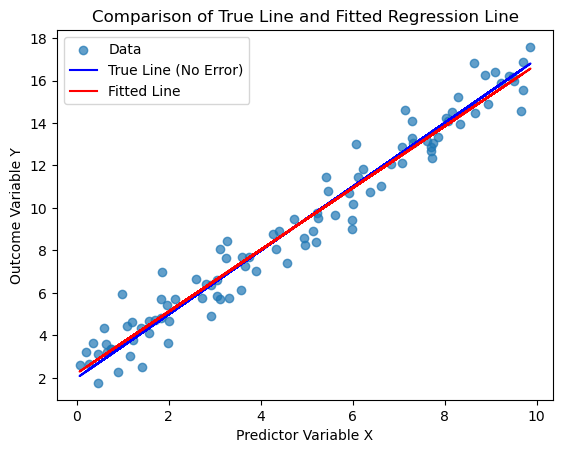

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Parameters
np.random.seed(42)
n = 100
beta_0 = 2.0  # True intercept
beta_1 = 1.5  # True slope
sigma = 1.0  # Standard deviation of the error term

# Simulate data
X = np.random.uniform(0, 10, n)
epsilon = np.random.normal(0, sigma, n)
Y = beta_0 + beta_1 * X + epsilon
data = pd.DataFrame({'X': X, 'Y': Y})

# Fit the model
model = smf.ols('Y ~ X', data=data).fit()

# Plot data, true line, and fitted line
plt.scatter(data['X'], data['Y'], label='Data', alpha=0.7)
plt.plot(data['X'], beta_0 + beta_1 * data['X'], color='blue', label='True Line (No Error)')
plt.plot(data['X'], model.predict(data), color='red', label='Fitted Line')
plt.xlabel("Predictor Variable X")
plt.ylabel("Outcome Variable Y")
plt.title("Comparison of True Line and Fitted Regression Line")
plt.legend()
plt.show()


The "True Line" (blue line) represents the relationship between X and Y in a population without random variation.
The "Fitted Line"  (red line) depends on 'statsmodels' and represents the best estimate of X and Y based on the data variation that we have.
Because of the variation used in the "Fitted Line", the two lines wont be exact and might have different intercepts and slopes.

# 4. Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values)

The 'fitted_model.fittedvalues' is found using estimates of each X value in the dataset. The outcome of this is finding the Y values that are the "fitted line values". These values are derrived from the cooficients in 'fitted_model.params' making them a deterministic output based on the estimated linear relationship.

# 5. Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by trendline='ols' and smf.ols(...).fit()) and why it requires "squares"

OLS chooses a fitted line the lessens the errors between observed and predicted Y values. It uses "squares" to remove any negative values that might cancel out the positive ones and eliminates larger errors more often.

# 6. Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)"; and therefore, why fitted_model.rsquared can be interpreted as a measure of the accuracy of the model; and, therefore what the two np.corrcoef(...)[0,1]**2 expressions capture in the context of Simple Linear Regression models.

## 1- ((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()
## 2- fitted_model.rsquared
## 3- np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2
## 4- np.corrcoef(Y,x)[0,1]**2

- The first expression, fitted_model.rsquared, and np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2 all represent the proportion of variance in 𝑌 explained by the model.
- They quantify how accurately the model captures the variation in 𝑌Y, with higher values indicating a better fit.
- In Simple Linear Regression, np.corrcoef(Y, X)[0,1]**2 also captures this proportion since 𝑌 is linearly related to 𝑋 by the model.

# 7. Indicate a couple of the assumptions of the Simple Linear Regression model specification that do not seem compatible with the example data below

In [10]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

These two issues — non-linearity and non-normal residuals — suggest that a linear model may not be the best choice for this data. Instead, a model that captures non-linear relationships, such as polynomial regression or a logarithmic transformation, might be more appropriate to accurately model and interpret the relationship between fertilizer use and crop yield.

# 8. Specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, and use the code below to characterize the evidence in the data relative to the null hypothesis and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.

In [5]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        03:20:05   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- If the OLS line fits well and there’s a small p-value, it suggests rejecting the null hypothesis 𝐻0 : 𝛽1 = 0, supporting the belief that there is a significant linear relationship between waiting time and eruption duration.
- If the LOWESS line deviates significantly from the OLS line, it might indicate that a more complex, non-linear model could better explain the relationship, potentially suggesting we reconsider using a simple linear model.

# 9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the null hypothesis in the context of short wait times which are less than short_wait_limit values of 62, 64, 66.

In [6]:
import plotly.express as px
import statsmodels.formula.api as smf

# Test different short wait limits
for short_wait_limit in [62, 64, 66]:
    short_wait = old_faithful.waiting < short_wait_limit
    model = smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit()
    
    # Print summary table specifically for the slope parameter
    print(f"Results for short wait times < {short_wait_limit}:")
    print(model.summary().tables[1])
    
    # Create a scatter plot with trendline
    fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                     title=f"Old Faithful Geyser Eruptions for short wait times (<{short_wait_limit})", 
                     trendline='ols')
    fig.show()


Results for short wait times < 62:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


Results for short wait times < 64:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


Results for short wait times < 66:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


- Significant Slope (Low p-value): Evidence suggests a relationship between waiting time and eruption duration even for shorter waits, supporting the idea that wait time predicts duration in the short-wait context.
- Non-significant Slope (High p-value): Suggests that the linear relationship observed in the full dataset may not hold for shorter wait times, implying that the duration of eruptions may be less predictable based on wait time alone when restricted to short intervals.

# 10. Let's now consider just the (n=160) long wait times (as specified in the code below), and write code to do the following:

## create fitted Simple Linear Regression models for boostrap samples and collect and visualize the bootstrapped sampling distribution of the fitted slope coefficients of the fitted models;
## simulate samples (of size n=160) from a Simple Linear Regression model that usesB0 =1.65, B1 = 0, o = 0.37 along with the values of waiting for to create simuations of and use these collect and visualize the sampling distribution of the fitted slope coefficient under a null hypothesis assumption of "no linear association (on average)"; then,
## report if 0 is contained within a 95% bootstrapped confidence interval; and if the simulated p-value matches smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]?

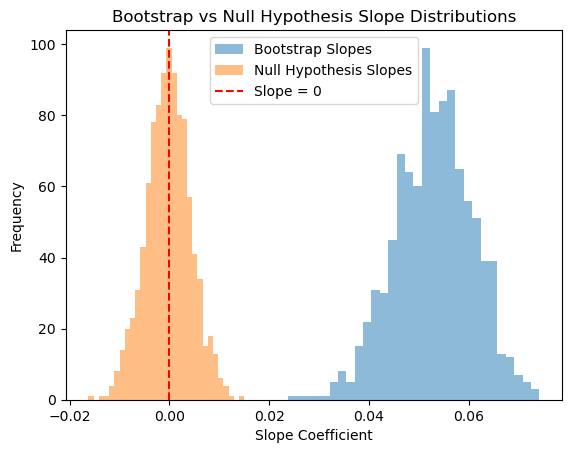

95% Bootstrap Confidence Interval for Slope: (0.03720780881620529, 0.06745701480590736)
Is zero within the 95% confidence interval? No
Simulated p-value from bootstrap: 2.0
Actual p-value from model: 2.3467760466093927e-18


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Load dataset
old_faithful = sns.load_dataset('geyser')

# Step 1: Filter data to long wait times
long_wait = old_faithful.waiting >= 63
long_wait_data = old_faithful[long_wait]

# Step 2: Bootstrap sampling of slope coefficients
n_bootstrap = 1000  # Number of bootstrap samples
bootstrap_slopes = []

for _ in range(n_bootstrap):
    bootstrap_sample = long_wait_data.sample(n=160, replace=True)
    bootstrap_model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrap_slopes.append(bootstrap_model.params['waiting'])

# Step 3: Simulate under null hypothesis (no association) and collect slope coefficients
B0, B1, sigma = 1.65, 0, 0.37
null_slopes = []

for _ in range(n_bootstrap):
    # Randomly sample 160 values from the long_wait_data's waiting column
    sample_waiting = long_wait_data['waiting'].sample(n=160, replace=True).reset_index(drop=True)
    simulated_Y = B0 + B1 * sample_waiting + np.random.normal(0, sigma, 160)
    simulated_data = pd.DataFrame({'waiting': sample_waiting, 'duration': simulated_Y})
    null_model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    null_slopes.append(null_model.params['waiting'])

# Step 4: Visualization of bootstrap and null slope distributions
plt.hist(bootstrap_slopes, bins=30, alpha=0.5, label='Bootstrap Slopes')
plt.hist(null_slopes, bins=30, alpha=0.5, label='Null Hypothesis Slopes')
plt.axvline(0, color='red', linestyle='--', label='Slope = 0')
plt.xlabel('Slope Coefficient')
plt.ylabel('Frequency')
plt.legend()
plt.title('Bootstrap vs Null Hypothesis Slope Distributions')
plt.show()

# Step 5: Confidence Interval for Bootstrap Slopes
bootstrap_ci_lower = np.percentile(bootstrap_slopes, 2.5)
bootstrap_ci_upper = np.percentile(bootstrap_slopes, 97.5)
print(f"95% Bootstrap Confidence Interval for Slope: ({bootstrap_ci_lower}, {bootstrap_ci_upper})")

# Check if zero is in the confidence interval
zero_in_ci = bootstrap_ci_lower <= 0 <= bootstrap_ci_upper
print(f"Is zero within the 95% confidence interval? {'Yes' if zero_in_ci else 'No'}")

# Step 6: Calculate p-value based on bootstrap distribution
p_value_simulated = (np.sum(np.array(bootstrap_slopes) >= 0) / n_bootstrap) * 2  # two-tailed
print(f"Simulated p-value from bootstrap: {p_value_simulated}")

# Step 7: Compare with p-value from the actual OLS fit
actual_model = smf.ols('duration ~ waiting', data=long_wait_data).fit()
actual_p_value = actual_model.pvalues['waiting']
print(f"Actual p-value from model: {actual_p_value}")


# 11. Since we've considered wait times of around <64 "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the Simple Linear Regression model specification using an indicator variable of the wait time length Yi = Bintercept + 1["long"] (k_i)Bcontrast + ξi where ξi equivalent N(0, θ) where we use ki (rather than xi) (to refer to the "kind" or "katagory" or "kontrast") column (that you may have noticed was already a part) of the original dataset; and, explain the "big picture" differences between this model specification and the previously considered model specifications 

## smf.ols('duration ~ waiting', data=old_faithful)

## smf.ols('duration ~ waiting', data=old_faithful[short_wait])

## smf.ols('duration ~ waiting', data=old_faithful[long_wait])

# and report the evidence against a null hypothesis of "no difference between groups "on average") for the new indicator variable based model

- Evidence Against Null Hypothesis: If the p-value for kind[T.long] is below 0.05, this provides evidence against the null hypothesis of "no difference between groups on average." This would indicate that "long" wait times are associated with significantly longer eruptions than "short" wait times.
- Big Picture Takeaway: This new model specification allows us to test for an average difference between groups without assuming a linear relationship within the entire dataset. This categorical approach is helpful when the relationship may not be well-represented by a simple continuous slope across all data points, as it focuses on the difference in means rather than the rate of change.

# 12. Identify which of the histograms suggests the plausibility of the assumption that the distribution of error terms is normal for each of the models, and explain why the other three do not support this assumption.

In [11]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import pandas as pd

# Load the dataset and define subsets for short and long waits
old_faithful = sns.load_dataset('geyser')

# Define short and long wait conditions based on previous criteria
short_wait = old_faithful['waiting'] < 68
long_wait = old_faithful['waiting'] >= 68

# Ensure the 'kind' column is present to categorize 'short' and 'long' waits
old_faithful['kind'] = old_faithful['waiting'].apply(lambda x: 'short' if x < 68 else 'long')

# Collect residuals for each model
model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

# Create subplots for histograms of residuals
fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):
    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i / 2) + 1, col=(i % 2) + 1)
    fig.update_xaxes(title_text="n=" + str(len(resid)), row=int(i / 2) + 1, col=(i % 2) + 1)    
    
    # Overlay normal distribution curve
    normal_range = np.arange(-3 * resid.std(), 3 * resid.std(), 0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i / 2) + 1, col=(i % 2) + 1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2, 2])
fig.show()  # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

- The histogram for Model 1 (All Data Using Slope) is most likely to support the normality assumption, as it uses all data continuously, potentially yielding residuals that better align with a normal distribution.
- Models 2, 3, and 4 are less likely to support the normality assumption due to:
+ Model 2: Limited range (only short waits) might introduce skewness.
+ Model 3: Heavy tails or skewness specific to long waits.
+ Model 4: The use of an indicator variable ("kind") can create a bimodal distribution if the two groups differ substantially in mean duration.

# 13. The "short" and "long" wait times are not "before and after" measurements so there are not natural pairs on which to base differences on which to do a "one sample" (paired differences) hypothesis test; but, we can do "two sample" hypothesis testing using a permuation test, or create a 95% bootstrap confidence interval for the difference in means of the two populations.

## (A) Do a permuation test H0 : μshort = μ long no difference in duration between short and long groups by "shuffling" the labels

In [5]:
import numpy as np

# Observed difference in means
short_durations = old_faithful[old_faithful['kind'] == 'short']['duration']
long_durations = old_faithful[old_faithful['kind'] == 'long']['duration']
observed_diff = long_durations.mean() - short_durations.mean()

# Permutation test
n_permutations = 1000
perm_diffs = []

# Concatenate data and shuffle labels
combined_durations = np.concatenate([short_durations, long_durations])
n_short = len(short_durations)

for _ in range(n_permutations):
    np.random.shuffle(combined_durations)
    perm_short = combined_durations[:n_short]
    perm_long = combined_durations[n_short:]
    perm_diff = perm_long.mean() - perm_short.mean()
    perm_diffs.append(perm_diff)

# Calculate p-value
p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
print(f"Observed difference in means: {observed_diff}")
print(f"Permutation test p-value: {p_value}")


Observed difference in means: 2.2036002325581396
Permutation test p-value: 0.0


## (B) Create a 95% bootstrap confidence interval by repeatedly bootstrapping within each group and applying np.quantile(bootstrapped_mean_differences, [0.025, 0.975]) to the collection of differences between the sample means.

In [6]:
# Bootstrap confidence interval
n_bootstrap = 1000
boot_diffs = []

for _ in range(n_bootstrap):
    boot_short = np.random.choice(short_durations, size=len(short_durations), replace=True)
    boot_long = np.random.choice(long_durations, size=len(long_durations), replace=True)
    boot_diff = boot_long.mean() - boot_short.mean()
    boot_diffs.append(boot_diff)

# Calculate 95% confidence interval
ci_lower, ci_upper = np.quantile(boot_diffs, [0.025, 0.975])
print(f"95% Bootstrap Confidence Interval for difference in means: ({ci_lower}, {ci_upper})")


95% Bootstrap Confidence Interval for difference in means: (2.1062474069767454, 2.3009501860465122)


### (a) Explain how the sampling approaches work for the two simulations.

- Permutation Test: The permutation test evaluates the null hypothesis by randomly shuffling group labels to simulate a scenario where there is no difference in means. By calculating the mean difference for many reshuffled samples, we create a distribution of differences that could occur by chance. The p-value tells us how unusual the observed difference is compared to this random distribution.

- Bootstrap Confidence Interval: The bootstrap approach creates multiple resamples with replacement from each group to estimate the sampling variability of the mean difference. By computing the difference for each resample, we generate a distribution of differences, which we use to calculate a confidence interval. This interval estimates the range within which the true difference in means likely falls.

### (b) Compare and contrast these two methods with the indicator variable based model approach used in Question 11, explaining how they're similar and different.

Similarities:
- All three methods aim to assess whether there is a significant difference in mean durations between "short" and "long" wait times.
- The indicator variable model and the bootstrap both provide estimates of the difference in means. The indicator model uses a regression coefficient, while the bootstrap creates a confidence interval.

Differences:
- Methodology: The indicator variable model uses a regression approach to estimate the difference in means by introducing a categorical predictor (kind), while the permutation and bootstrap tests are resampling methods.
- Output: The indicator variable model provides a single estimate with a p-value for the difference, assuming a normal distribution of residuals. The permutation test focuses on p-value estimation, while the bootstrap method provides a confidence interval.

# 14. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Mostly

# ChatBot (ChatGPT) chat summary

1. Simple Linear Regression Model (SLR)
Concept: We started by defining the Simple Linear Regression model, where 𝑌=𝛽0+𝛽1𝑋+𝜖, with 𝛽0 as the intercept, β1 as the slope, and ϵ as the error term.
Interpretation: The slope 𝛽1 represents the change in 𝑌 for a one-unit increase in 𝑋, helping us predict 𝑌 based on 𝑋.

2. Fitting and Visualizing the Model
We simulated data following a linear regression model and fit an SLR model using both numpy and statsmodels libraries. The fitted model provided estimates of 𝛽0 and 𝛽1 , allowing us to visualize the fit line and residuals.
Residual Analysis: We plotted residuals to check assumptions, focusing on whether they appeared normally distributed, which is crucial for accurate inference in SLR.

3. R-squared and Interpretation of Fit
We explained that R-squared measures the proportion of variance in 𝑌 explained by 𝑋 in the model. It indicates model accuracy, where values closer to 1 suggest a stronger linear relationship.
Alternative Expressions for R-squared: Using squared correlation values and residual sum of squares, we explained how R-squared measures overall fit.

4. Assumptions of SLR and Old Faithful Geyser Data
We checked whether certain assumptions—like linearity and normality of residuals—held in the Old Faithful Geyser dataset. Analysis showed potential issues with non-linearity, especially in the relationship between waiting time and duration for short and long wait times.

5. Testing Linear Relationships in Subsets
Short vs. Long Wait Times: We analyzed subsets based on waiting times (short <64 and long >71 minutes) and fit separate linear models for each subset.
Indicator Variable Approach: We then introduced an indicator variable to represent "short" and "long" wait times in a single model. This allowed us to estimate the difference in mean duration between the two groups using a categorical predictor.

6. Comparing Different Approaches
Permutation Test: We performed a permutation test to assess the null hypothesis 𝐻0 : 𝜇short = 𝜇long. By shuffling group labels, we generated a distribution of mean differences that could occur by chance, calculating a p-value based on the observed difference.
Bootstrap Confidence Interval: We used bootstrapping to create a 95% confidence interval for the difference in means by resampling from the "short" and "long" groups. This interval provided a range of plausible values for the true mean difference.

7. Summary of Hypothesis Testing Methods
Indicator Variable Model: A regression-based approach to estimate the difference in means directly with a categorical predictor.
Permutation Test: Robust and non-parametric, offering a p-value without assuming normality.
Bootstrap Confidence Interval: Flexible, providing a confidence interval based on resampled data, making fewer assumptions about distribution.

https://chatgpt.com/share/672d37fd-3248-8006-bace-7726aa58e655

# 